# 강의내용

* 교재 8장 HFDP Ch8
* Template Method 패턴 (Behavioral Design Pattern)
* 프로그래밍 'Barista' (HFDP Ch8)
* TOC
    * intro
    * problems
    * before
    * design
    * after
    * case implementation
    * exercise (by Sat to git: 50% for 1 day late deadline) 
        * case extension
            * Caramel Macchiato (vanilla syrup, espresso, milk, caramel) - Decorator패턴과 비교
        * new case - DuckComparator

# 1. Template 패턴

* 알고리즘의 Template을 구현하는 것.
* Encapsulating Algorithms 알고리즘 추상화
    * "defined the selection of an algorithm in a method,
    deferring some steps to subclasses."
    * 알고리즘이 비슷한 여러 객체 - 절차 및 기능이 비슷 (절차는 동일invariant parts, 기능이 부분적으로 다름 varying parts)
    * 부분적으로 다른 기능은 하위 클래스 별로 적합하게 구현

* cases
    * HFDP barista (tea, coffee)
    * frameworks - JFrame, Applet...
        * public void paint(Graphics g)
    * parser (read, parse, write)

* 디자인패턴 요소

요소 | 설명
---|---
name | Template
problem | 객체 서로 알고리즘이 비슷.
solution | 상속으로 고정, 변동 분리
consequence | 중복이 없어짐.

# 2. 문제

* 2개의 객체가 있고, 서로 알고리즘이 비슷. 수정할 경우, 중복때문에 불일치 발생할 수 있슴.

In [1]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [2]:
%load_ext plantuml_magics

In [3]:
import glob
glob.glob(r'./*.jar')

['./plantuml.jar']

In [32]:
!which dot

/opt/local/bin/dot


In [3]:
import os
os.environ['GRAPHVIZ_DOT']='/opt/local/bin/dot'
print os.environ['GRAPHVIZ_DOT']
!java -jar plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


# 3. before

* 커피, 차 만드는 알고리즘이 서로 비슷
* 알고리즘이 중복해서 존재
* Coffee
    * 물 끓이고 boilWater()
    * 끓는 물에 커피를 우려 내고 brewCoffeeGrinds()
    * 컵에 부어서 pourInCup()
    * 설탕과 밀크 추가 addSugarAndMilk()
* Tea
    * 물 끓이고 boilWater()
    * 끓는 물에 차를 우려 내고 steepTeaBag()
    * 컴에 부어서 pourInCup()
    * 레몬 추가 addLemon()
* 상속을 이용해서 설계를 해도(아래 before2) 공통부분을 더욱 추상화할 수 있다.

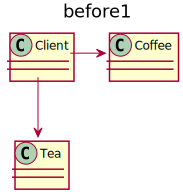

In [5]:
%%plantuml
@startuml
title before1
class Coffee
class Tea
Client -right-> Coffee
Client -down-> Tea
@enduml

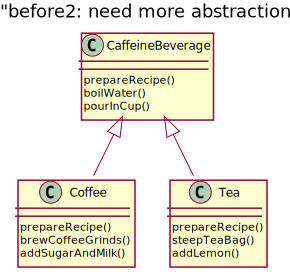

In [6]:
%%plantuml
@startuml
title "before2: need more abstraction"
class CaffeineBeverage {
    prepareRecipe()
    boilWater()
    pourInCup()
}
class Coffee {
    prepareRecipe()
    brewCoffeeGrinds()
    addSugarAndMilk()
}
class Tea {
    prepareRecipe()
    steepTeaBag()
    addLemon()
}
CaffeineBeverage <|-- Coffee
CaffeineBeverage <|-- Tea
@enduml

In [ ]:
# %load ./src/headfirst/templatemethod/simplebarista/Coffee.java
package headfirst.templatemethod.simplebarista;

public class Coffee {
 
	void prepareRecipe() {
		boilWater();
		brewCoffeeGrinds();
		pourInCup();
		addSugarAndMilk();
	}
 
	public void boilWater() {
		System.out.println("Boiling water");
	}
 
	public void brewCoffeeGrinds() {
		System.out.println("Dripping Coffee through filter");
	}
 
	public void pourInCup() {
		System.out.println("Pouring into cup");
	}
 
	public void addSugarAndMilk() {
		System.out.println("Adding Sugar and Milk");
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/simplebarista/Tea.java
package headfirst.templatemethod.simplebarista;

public class Tea {
 
	void prepareRecipe() {
		boilWater();
		steepTeaBag();
		pourInCup();
		addLemon();
	}
 
	public void boilWater() {
		System.out.println("Boiling water");
	}
 
	public void steepTeaBag() {
		System.out.println("Steeping the tea");
	}
 
	public void addLemon() {
		System.out.println("Adding Lemon");
	}
 
	public void pourInCup() {
		System.out.println("Pouring into cup");
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/simplebarista/Barista.java
package headfirst.templatemethod.simplebarista;

public class Barista {
 
	public static void main(String[] args) {
		Tea tea = new Tea();
		Coffee coffee = new Coffee();
		System.out.println("Making tea...");
		tea.prepareRecipe();
		System.out.println("Making coffee...");
		coffee.prepareRecipe();
	}
}


In [6]:
!javac -d classes/ -sourcepath src/ src/headfirst/templatemethod/simplebarista/*.java
!java -cp classes/ headfirst.templatemethod.simplebarista.Barista

Making tea...
Boiling water
Steeping the tea
Pouring into cup
Adding Lemon
Making coffee...
Boiling water
Dripping Coffee through filter
Pouring into cup
Adding Sugar and Milk


# 4. 설계

* 상속으로 공통부분은 고정화 (final), 나머지 변동 부는 하위에서 구현 (abstract method) 
* Hollywood Principle
    * Don't call us, we'll call you
    * 인터페이스가 절차를 구현해 놓고, 하위클래스가 이를 따라함
    * inversion of control

* 비교
    * Factory method - 상속으로 factory method 구현
    * Strategy pattern - 경우에 따라 호출하는 함수는 동일하지만, 하는 방식은 다름.

* 역할
    * 추상클래스 - 알고리즘의 고정부
        * final
        * abstract
        * hook()함수 - 하위클래스에서 구현해도 되고, 안해도 되는 함수.
    * 구체클래스 - 알고리즘의 변동부
    * templateMethod
        * declared in the abstract class, but only given an empty or default implementation (p.292)


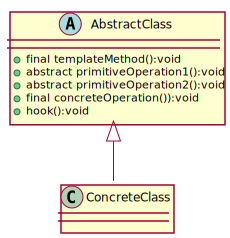

In [7]:
%%plantuml
@startuml
abstract class AbstractClass {
    +final templateMethod():void
    +abstract primitiveOperation1():void
    +abstract primitiveOperation2():void
    +final concreteOperation()):void
    +hook():void
}

class ConcreteClass {
}
AbstractClass <|-- ConcreteClass
@enduml

# 5. after

* 교재 HFDP Ch8 'Barista'

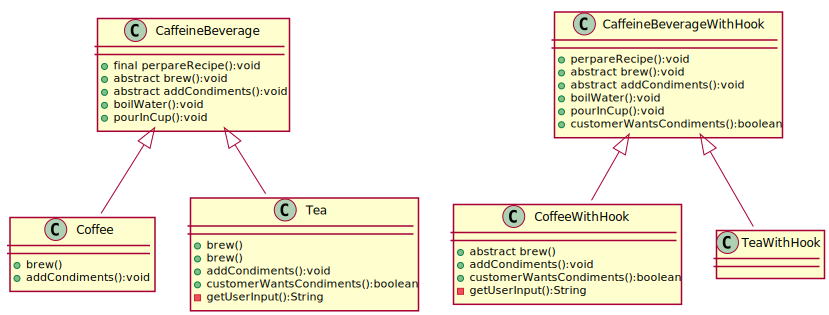

In [11]:
%%plantuml
@startuml
class CaffeineBeverage {
    +final perpareRecipe():void
    +abstract brew():void
    +abstract addCondiments():void
    +boilWater():void
    +pourInCup():void
}
class Coffee {
    +brew()
    +addCondiments():void
}
class Tea {
    +brew()
}
class CaffeineBeverageWithHook {
    +perpareRecipe():void
    +abstract brew():void
    +abstract addCondiments():void
    +boilWater():void
    +pourInCup():void
    +customerWantsCondiments():boolean
}
class CoffeeWithHook {
    +abstract brew()
    +addCondiments():void
    +customerWantsCondiments():boolean
    -getUserInput():String
}
class TeaWithHook {
    +brew()
    +addCondiments():void
    +customerWantsCondiments():boolean
    -getUserInput():String
}

# 6. Case Implementation


* barista
* sorting
* frame
* applet


## 6.1. barista

* template method - prepareRecipe()
* hook method - customerWantsCondiments()

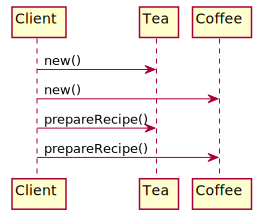

In [7]:
%%plantuml
@startuml
Client -> Tea:new()
Client -> Coffee:new()
Client -> Tea:prepareRecipe()
Client -> Coffee:prepareRecipe()
@enduml

In [ ]:
# %load ./src/headfirst/templatemethod/barista/CaffeineBeverage.java
package headfirst.templatemethod.barista;

public abstract class CaffeineBeverage {
  
	final void prepareRecipe() {
		boilWater();
		brew();
		pourInCup();
		addCondiments();
	}
 
	abstract void brew();
  
	abstract void addCondiments();
 
	void boilWater() {
		System.out.println("Boiling water");
	}
  
	void pourInCup() {
		System.out.println("Pouring into cup");
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/Coffee.java
package headfirst.templatemethod.barista;

public class Coffee extends CaffeineBeverage {
	public void brew() {
		System.out.println("Dripping Coffee through filter");
	}
	public void addCondiments() {
		System.out.println("Adding Sugar and Milk");
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/Tea.java
package headfirst.templatemethod.barista;

public class Tea extends CaffeineBeverage {
	public void brew() {
		System.out.println("Steeping the tea");
	}
	public void addCondiments() {
		System.out.println("Adding Lemon");
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/CaffeineBeverageWithHook.java
package headfirst.templatemethod.barista;

public abstract class CaffeineBeverageWithHook {
 
	void prepareRecipe() {
		boilWater();
		brew();
		pourInCup();
		if (customerWantsCondiments()) {
			addCondiments();
		}
	}
 
	abstract void brew();
 
	abstract void addCondiments();
 
	void boilWater() {
		System.out.println("Boiling water");
	}
 
	void pourInCup() {
		System.out.println("Pouring into cup");
	}
 
	boolean customerWantsCondiments() {
		return true;
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/CoffeeWithHook.java
package headfirst.templatemethod.barista;

import java.io.*;

public class CoffeeWithHook extends CaffeineBeverageWithHook {
 
	public void brew() {
		System.out.println("Dripping Coffee through filter");
	}
 
	public void addCondiments() {
		System.out.println("Adding Sugar and Milk");
	}
 
	public boolean customerWantsCondiments() {

		String answer = getUserInput();

		if (answer.toLowerCase().startsWith("y")) {
			return true;
		} else {
			return false;
		}
	}
 
	private String getUserInput() {
		String answer = null;

		System.out.print("Would you like milk and sugar with your coffee (y/n)? ");

		BufferedReader in = new BufferedReader(new InputStreamReader(System.in));
		try {
			answer = in.readLine();
		} catch (IOException ioe) {
			System.err.println("IO error trying to read your answer");
		}
		if (answer == null) {
			return "no";
		}
		return answer;
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/TeaWithHook.java
package headfirst.templatemethod.barista;

import java.io.*;

public class TeaWithHook extends CaffeineBeverageWithHook {
 
	public void brew() {
		System.out.println("Steeping the tea");
	}
 
	public void addCondiments() {
		System.out.println("Adding Lemon");
	}
 
	public boolean customerWantsCondiments() {

		String answer = getUserInput();

		if (answer.toLowerCase().startsWith("y")) {
			return true;
		} else {
			return false;
		}
	}
 
	private String getUserInput() {
		// get the user's response
		String answer = null;

		System.out.print("Would you like lemon with your tea (y/n)? ");

		BufferedReader in = new BufferedReader(new InputStreamReader(System.in));
		try {
			answer = in.readLine();
		} catch (IOException ioe) {
			System.err.println("IO error trying to read your answer");
		}
		if (answer == null) {
			return "no";
		}
		return answer;
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/barista/BeverageTestDrive.java
package headfirst.templatemethod.barista;

public class BeverageTestDrive {
	public static void main(String[] args) {
 
		Tea tea = new Tea();
		Coffee coffee = new Coffee();
 
		System.out.println("\nMaking tea...");
		tea.prepareRecipe();
 
		System.out.println("\nMaking coffee...");
		coffee.prepareRecipe();

 
		TeaWithHook teaHook = new TeaWithHook();
		CoffeeWithHook coffeeHook = new CoffeeWithHook();
 
		System.out.println("\nMaking tea...");
		teaHook.prepareRecipe();
 
		System.out.println("\nMaking coffee...");
		coffeeHook.prepareRecipe();
	}
}


In [ ]:
!javac -d classes/ -sourcepath src/ src/headfirst/templatemethod/barista/*.java
!java -cp classes/ headfirst.templatemethod.barista.BeverageTestDrive


Making tea...
Boiling water
Steeping the tea
Pouring into cup
Adding Lemon

Making coffee...
Boiling water
Dripping Coffee through filter
Pouring into cup
Adding Sugar and Milk

Making tea...
Boiling water
Steeping the tea
Pouring into cup
Would you like lemon with your tea (y/n)? 

## 6.2 sort


* sorting an array of Objects
    * Arrays.sort(Object[])는 Comparable interface 구현해야 (정렬순서는 compareTo()에 정의한 대로)
    * 또는 Comparator interface 구현해야 -> 과제
```
    public class Duck implements Comparable<Duck> {
        ...
        public int compareTo(Duck duck) {
            return this.weight - duck.weight
        }
    }
    ...
    java.util.Arrays.sort(Ducks)
    ...
```

* sorting primitives - int, short, float, double, byte
```
    int[] numbers = {2, 8, 7, 5, 3, 1, 4, 6}; 
    Arrays.sort(numbers);
```

* sorting wrapper classes
```
    String[] cities = {"Seoul", "Tokyo", "New York", "Paris", "Sydney"}
    Arrays.sort(cities);
```


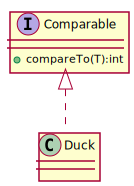

In [21]:
%%plantuml
@startuml
interface Comparable {
        +compareTo(T):int
}
Comparable <|.. Duck
@enduml

In [ ]:
# %load ./src/headfirst/templatemethod/sort/Duck.java
package headfirst.templatemethod.sort;

public class Duck implements Comparable {
	String name;
	int weight;
  
	public Duck(String name, int weight) {
		this.name = name;
		this.weight = weight;
	}
 
	public String toString() {
		return name + " weighs " + weight;
	}
 
 
  
	public int compareTo(Object object) {
 
		Duck otherDuck = (Duck)object;
  
		if (this.weight < otherDuck.weight) {
			return -1;
		} else if (this.weight == otherDuck.weight) {
			return 0;
		} else { // this.weight > otherDuck.weight
			return 1;
		}
	}
}


In [ ]:
# %load ./src/headfirst/templatemethod/sort/DuckSortTestDrive.java
package headfirst.templatemethod.sort;

import java.util.ArrayList;
import java.util.Arrays;

public class DuckSortTestDrive {

	public static void main(String[] args) {
		Duck[] ducks = { 
						new Duck("Daffy", 8), 
						new Duck("Dewey", 2),
						new Duck("Howard", 7),
						new Duck("Louie", 2),
						new Duck("Donald", 10), 
						new Duck("Huey", 2)
		 };

		System.out.println("Before sorting:");
		display(ducks);

		Arrays.sort(ducks);
 
		System.out.println("\nAfter sorting:");
		display(ducks);
	}

	public static void display(Duck[] ducks) {
		for (int i = 0; i < ducks.length; i++) {
			System.out.println(ducks[i]);
		}
	}
}


In [ ]:
!javac -d classes/ -sourcepath src/ src/headfirst/templatemethod/sort/*.java
!java -cp classes/ headfirst.templatemethod.sort.DuckSortTestDrive

## 6.3 frame

* p.306
* JFrame vs JPanel
    * JFrame은 window. 그 안에 JPanel을 가질 수 있슴.
        * JFrame -> Frame, Window, Container, Component, and finally Object
    * JPanel은 window가 아님.
* paint hook

In [ ]:
# %load ./src/headfirst/templatemethod/frame/MyFrame.java
package headfirst.templatemethod.frame;

import java.awt.*;
import javax.swing.*;

public class MyFrame extends JFrame {

	public MyFrame(String title) {
		super(title);
		this.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);

		this.setSize(300,300);
		this.setVisible(true);
	}

	public void paint(Graphics graphics) {
		super.paint(graphics);
		String msg = "I rule!!";
		graphics.drawString(msg, 100, 100);
	}

	public static void main(String[] args) {
		MyFrame myFrame = new MyFrame("Head First Design Patterns");
	}
}


In [19]:
!javac -d classes/ -sourcepath src/ src/headfirst/templatemethod/frame/MyFrame.java 
!java -cp classes/ headfirst.templatemethod.frame.MyFrame

## 6.4 Applets

* p.307
* 웹브라우저에서 실행되는 자바. 클라이언트에 다운로드 되어서 실행. JVM이 있어야 함.
* java.applet.Applet 확장해서 구현
* 라이프사이클 (main() 함수가 없고)
    * init
    * start
    * stop
    * destroy
    * paint (java.awt paint함수와 동일)
        * start()함수 후 자동으로 호출
        * repaint가 필요한 경우 자동으로 호출. the java.awt.

* 웹브라우저에서 security에서 Java Applet실행가능하게 (예: Internet Explorer)
    * Click Tools and then Internet Options
    * Select the Security tab, and select the Custom Level button
    * Scroll down to Scripting of Java applets
    * Make sure the Enable radio button is checked
    * Click OK to save your preference
    * ```<applet codebase=../../../../classes/
code="headfirst/templatemethod/applet/MyApplet.class"
width="320" height="120">```

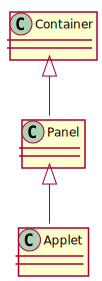

In [18]:
%%plantuml
@startuml
Container <|-- Panel
Panel <|-- Applet
@enduml

In [ ]:
# %load ./src/headfirst/templatemethod/applet/MyApplet.java
package headfirst.templatemethod.applet;

import java.applet.Applet;
import java.awt.Graphics;

public class MyApplet extends Applet {
    String message;
 
    public void init() {
        message = "Hello World, I'm alive!";
        repaint();
    }
 
    public void start() {
        message = "Now I'm starting up...";
        repaint();
    }
 
    public void stop() {
        message = "Oh, now I'm being stopped...";
        repaint();
    }
 
    public void destroy() {
        message = "Goodbye, cruel world";
        repaint();
    }
 
    public void paint(Graphics g) {
        g.drawString(message, 5, 15);
    }
}

